In [1]:
import numpy as np
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv("survey_responses.csv")
print(df.shape)
df.head()

(459, 42)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,46,47,48,49
0,2,6,2,5,2,6,2,6,2,6,...,3,5,2,6,2,6,3,5,2,6
1,5,5,5,5,5,5,5,3,4,5,...,3,5,3,6,4,6,5,4,3,5
2,5,1,6,2,7,2,7,1,5,1,...,6,1,6,1,2,2,6,1,5,1
3,5,4,3,3,4,5,6,4,5,4,...,5,3,5,5,4,4,4,5,4,4
4,5,2,5,2,6,4,6,4,4,2,...,5,4,4,4,4,4,5,4,5,4


# Split data for EFA and CFA
Minimum sample size requirements:
- EFA: 150 to 200
- CFA: 200 and 5:1 participant to item ratio

In [3]:
efa_data = df.sample(n=200, random_state=0)
print(efa_data.shape)
efa_data.head()

(200, 42)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,46,47,48,49
164,3,5,3,5,3,4,4,5,3,5,...,3,5,3,5,3,6,3,5,3,6
229,1,7,1,7,1,7,1,7,1,7,...,1,6,1,7,1,7,1,7,1,7
311,1,7,1,7,1,7,1,7,1,7,...,1,7,1,7,1,7,1,7,1,6
221,1,5,5,4,4,6,6,5,1,6,...,5,6,7,2,1,7,6,3,7,4
122,3,5,2,5,2,6,2,4,5,6,...,3,3,5,2,4,4,4,4,4,4


In [4]:
cfa_data = df[~df.index.isin(efa_data.index)]
print(cfa_data.shape)
cfa_data.head()

(259, 42)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,46,47,48,49
0,2,6,2,5,2,6,2,6,2,6,...,3,5,2,6,2,6,3,5,2,6
2,5,1,6,2,7,2,7,1,5,1,...,6,1,6,1,2,2,6,1,5,1
3,5,4,3,3,4,5,6,4,5,4,...,5,3,5,5,4,4,4,5,4,4
9,2,6,1,6,1,6,1,6,3,6,...,1,6,1,6,1,6,1,6,1,6
11,2,4,6,4,6,3,7,4,5,2,...,7,2,6,2,6,4,4,3,7,1


# Factorability/Sampling Adequacy

## Bartlett's Test of Sphericity
Checks whether correlations are present in the given data by comparing the correlation matrix to the identity matrix. If test results are found to be statistically insignificant (p < 0.05), the data is not suitable for factor analysis.

In [5]:
efa_chi_square_value, efa_p_value = calculate_bartlett_sphericity(efa_data)
print("chi_square_value:", efa_chi_square_value)
print("p_value", efa_p_value)

chi_square_value: 11069.502963032708
p_value 0.0


## Kaiser-Meyer-Olkin (KMO) Measure of Sampling Adequacy 
Measures how suited the data is for factor analysis. Values range between 0 and 1, > 0.6 indicates the data is suitable for factor analysis.

In [6]:
efa_kmo, efa_kmo_model=calculate_kmo(efa_data)
print("KMO:", efa_kmo_model)

KMO: 0.9802202702765951


# Extract Factors
Using principal axis factoring with oblique (promax) rotation

In [7]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=42, method="principal", rotation="promax", svd_method="lapack")
fa.fit(efa_data)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([30.05323837,  1.14558273,  0.88649448,  0.78897209,  0.74464934,
        0.58223818,  0.5359388 ,  0.48267915,  0.47250926,  0.46161258,
        0.40869712,  0.38740363,  0.3480623 ,  0.33723854,  0.32532437,
        0.29497549,  0.28672294,  0.25651128,  0.23682525,  0.22361009,
        0.20710832,  0.20037591,  0.1895449 ,  0.17144683,  0.16736894,
        0.16460864,  0.15750036,  0.14566998,  0.14055734,  0.13310413,
        0.12447201,  0.11659508,  0.1111687 ,  0.10308386,  0.09632127,
        0.09180526,  0.08945001,  0.08205817,  0.07274209,  0.07047589,
        0.06143596,  0.04382034])

## Parallel Analysis

In [8]:
# Generate random dataset with sample number of responses and variables in our collected data
lower, upper = 1, 7
mu, sigma = 4, 1
random_df = pd.DataFrame(np.zeros(efa_data.shape), columns=efa_data.columns)
for i in range(efa_data.shape[1]):
    rand_data = draw = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(size=200, random_state=i).astype(int)
    random_df.iloc[:, i] = rand_data
print(random_df.shape)
random_df.head()

(200, 42)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,46,47,48,49
0,4,3,3,4,5,3,5,2,5,1,...,5,3,2,3,4,5,3,4,3,3
1,4,4,2,4,4,5,3,4,5,4,...,3,3,4,3,4,3,5,4,2,2
2,4,1,4,3,5,3,4,3,5,3,...,4,3,2,3,5,3,5,4,4,4
3,4,3,3,4,4,5,2,4,4,2,...,5,3,4,3,2,4,4,2,3,2
4,3,2,3,5,4,3,2,5,3,2,...,4,5,1,4,4,4,4,4,3,2


In [9]:
random_fa = FactorAnalyzer(n_factors=42, method="principal", rotation="promax")
random_fa.fit(random_df)
random_ev, random_v = random_fa.get_eigenvalues()
random_ev

array([1.98344587, 1.81606324, 1.79803853, 1.68422797, 1.64690358,
       1.59070158, 1.57461924, 1.46111557, 1.43621756, 1.38999192,
       1.31601223, 1.2808481 , 1.22368856, 1.17387071, 1.13205984,
       1.09581979, 1.06708274, 1.03272325, 1.01475546, 1.00086382,
       0.96134811, 0.94655896, 0.91713377, 0.86870018, 0.85920178,
       0.83462725, 0.79182389, 0.76870452, 0.70943982, 0.70811072,
       0.65162155, 0.63458198, 0.57116878, 0.56611086, 0.53469775,
       0.51967089, 0.47274291, 0.4606018 , 0.42793603, 0.38744683,
       0.35543306, 0.33328897])

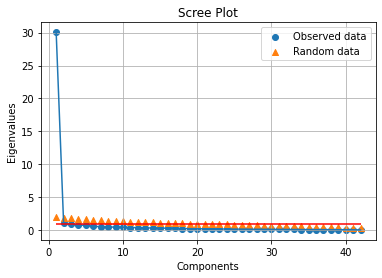

In [10]:
# Create scree plot to visualize

# Collected data
plt.scatter(range(1, efa_data.shape[1]+1),ev, label="Observed data")
plt.plot(range(1, efa_data.shape[1]+1),ev)

# Random data
plt.scatter(range(1, random_df.shape[1]+1), random_ev, marker="^", label="Random data")
# plt.plot(range(1, random_df.shape[1]+1), random_ev)

plt.hlines(y=1, xmin=1, xmax=42, color='r')

plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')
plt.legend()
plt.grid()
plt.show()

# Run EFA again

In [11]:
# Load survey items
survey_items = pd.read_json("survey_items.json").set_index("item_id")
pd.options.display.max_colwidth = 1000

In [12]:
LOADING_THRESHOLD = 0.4
COMMUNALITY_THRESHOLD = 0.4 
def run_full_efa(num_factors, data, save_fig=False):
    # Fit model
    fa = FactorAnalyzer(n_factors=num_factors, method="principal", rotation="promax")
    fa.fit(data)
    
    # Print variance
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))
    
    # Get communalities
    col_names = [str(i) for i in range(num_factors)] + ["communality_estimate"]
    factor_pattern_df = pd.DataFrame(np.concatenate((fa.loadings_, fa.get_communalities().reshape(-1,1)), axis=1), index=data.columns, columns=col_names)
    
    # Filter out cross loadings
    target_idx = np.where(((abs(factor_pattern_df.iloc[:,:num_factors]) > 0.4).sum(axis=1) <= 1))[0]
    factor_pattern_df = factor_pattern_df.iloc[target_idx]
    
    # Group by factor loadings and threshold
    factor_dfs = []
    factor_item_map = {}
    for i in range(num_factors): 
        factor_df = factor_pattern_df[(factor_pattern_df[str(i)] > LOADING_THRESHOLD) & (factor_pattern_df["communality_estimate"] > COMMUNALITY_THRESHOLD)] #.sort_values(by=str(i), ascending=False)
        factor_dfs.append(factor_df)
        factor_item_map[i] = list(factor_df.index.map(lambda x: int(x)))
    
    # Reorganize groupings for more intuitive visualization (Factor 1: positive, Factor 2: negative)
    f1 = factor_dfs[1].sort_values(by="1", ascending=False)
    f2 = factor_dfs[0].sort_values(by="0", ascending=False)
    result = pd.concat([f1,f2])
    result = result.rename(columns={"0": "2"})[["1", "2", "communality_estimate"]]
    
    # Plot heatmap for visualization and save figure
    cmap = sns.diverging_palette(150, 150, as_cmap=True)
    factor_loading_fig = sns.heatmap(result.drop("communality_estimate", axis=1), annot=True, cmap=cmap, vmin=-1, vmax=1)
    if save_fig:
        factor_loading_fig.get_figure().savefig(f"efa_{num_factors}_factor_loadings.png")
    
    # Inspect item groupings
    items_df = pd.DataFrame()
    for i in range(num_factors):
        df = survey_items.loc[factor_item_map[i]][["factor_id", "content"]]
        df["factor_group"] = i
        items_df = pd.concat([items_df, df])
        
    # Reorganize groupings for more intuitive visualization (Factor 1: positive, Factor 2: negative)
    items_df.loc[items_df["factor_group"] == 0, "factor_group"] = 2
    items_df.sort_values(by="factor_group", inplace=True)
        
    display(items_df)
    
    return result, items_df

                          0         1
Variance          15.739016  8.070184
Proportional Var   0.374738  0.192147
Cumulative Var     0.374738  0.566886


,factor_id,content,factor_group
item_id,,,
49,24,The results match my expectations and I agree with them.,1
41,20,The presentation of the results leads me to believe the results are ordered correctly.,1
37,18,I would use this search engine in my everyday life.,1
21,10,The results page provides me enough information to find the answers I am looking for effectively.,1
19,9,I can easily understand the contents of the results page.,1
15,7,This system would work well in a different search task (i.e. looking up medical papers to diagnose a patient).,1
47,23,I trust that the results are ordered correctly and system will order results correctly for other queries.,1
46,23,I do not trust that the results are ordered correctly and that the system will correctly order results for other queries.,2
38,19,The result interface does not help me understand the true decision making process of the search engine ranker.,2


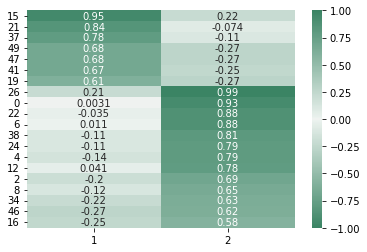

In [13]:
factor_2, factor_2_items = run_full_efa(2, efa_data)

# Final EFA

                         0         1
Variance          7.996753  4.746530
Proportional Var  0.399838  0.237326
Cumulative Var    0.399838  0.637164


,factor_id,content,factor_group
item_id,,,
19,9,I can easily understand the contents of the results page.,1
47,23,I trust that the results are ordered correctly and system will order results correctly for other queries.,1
49,24,The results match my expectations and I agree with them.,1
37,18,I would use this search engine in my everyday life.,1
21,10,The results page provides me enough information to find the answers I am looking for effectively.,1
15,7,This system would work well in a different search task (i.e. looking up medical papers to diagnose a patient).,1
41,20,The presentation of the results leads me to believe the results are ordered correctly.,1
46,23,I do not trust that the results are ordered correctly and that the system will correctly order results for other queries.,2
34,17,The format and amount of information provided in the result interface is not enough to help me understand why the results are ordered the way they are.,2


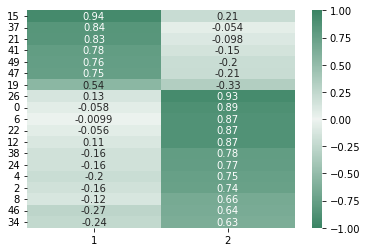

In [14]:
# 2 factor solution
factor_2_final, factor_2_items_final = run_full_efa(2, efa_data[list(factor_2.index)])

# CFA

In [15]:
import semopy

## Prepare data
Filter out items that will not be included, as determined from EFA.

In [16]:
factor_2_cfa_data = cfa_data[list(factor_2_final.index)]
print(factor_2_cfa_data.shape)
factor_2_cfa_data.head()

(259, 19)


,15,37,21,41,49,47,19,26,0,6,22,12,38,24,4,2,8,46,34
0,5,5,6,6,6,5,6,2,2,2,2,3,3,2,2,2,2,3,2
2,2,2,2,1,1,1,3,6,5,7,6,1,6,5,7,6,5,6,6
3,3,2,4,5,4,5,6,4,5,6,5,3,5,5,4,3,5,4,4
9,5,6,6,6,6,6,6,1,2,1,2,1,1,1,1,1,3,1,1
11,5,1,1,2,1,3,4,2,2,7,4,4,7,5,6,6,5,4,7


## Initialize and Fit Models

In [17]:
# 2 factor model - first order model
m2_1_desc = '''# measurement model
e =~ 26 + 0 + 6 + 22 + 12 + 38 + 24 + 4 + 2 + 8 + 46 + 34 + 15 + 37 + 21 + 41 + 49 + 47 + 19
'''

# 2 factor model - hierarchical model
m2_2_desc = ''' # measurement model
f1 =~ 15 + 37 + 21 + 41 + 49 + 47 + 19
f2 =~ 26 + 0 + 6 + 22 + 12 + 38 + 24 + 4 + 2 + 8 + 46 + 34
e =~ f1 + f2
'''

model_2_desc = [m2_1_desc, m2_2_desc]

In [18]:
# Initialize and fit models
models_2 = []
for desc in model_2_desc:
    model = semopy.Model(desc)
    model.fit(factor_2_cfa_data)
    models_2.append(model)

## Calculate Stats

In [19]:
'''
Given the observed and model-implied covariance matrices, calculate the standardized mean squared residual
according to the definition given by Hu and Bentler 1999.
'''
def calc_smsr(obs, impl):
    # Calculate 
    diag = np.sqrt(np.diagonal(obs))
    diagMatrix = np.tril(np.outer(diag, diag))
    
    p = obs.shape[0]
    smsr = np.sqrt((np.square(np.tril((obs - impl) / diagMatrix)).sum() * 2) / (p * (p + 1)))

    return smsr

In [20]:
def calc_stats(model, cov_matrix, model_name):
    model_stats = semopy.calc_stats(model)[["DoF", "DoF Baseline", "chi2 Baseline", "chi2", "chi2 p-value", "TLI", "CFI", "RMSEA"]]
    
    # SMSR is not supported in semopy, calculate manually
    sigma, _ = model.calc_sigma()
    sigma = pd.DataFrame(sigma, index=cov_matrix.index, columns=cov_matrix.columns)
    smsr = calc_smsr(cov_matrix, sigma)
    model_stats["SMSR"] = smsr
    
    model_stats.rename({"Value": model_name}, inplace=True)
                        
    return model_stats

In [21]:
# Calculate observed covariance matrix
# Reorder rows/columns to match semopy's alphabetical order sorting
cov_matrix_2 = factor_2_cfa_data.cov().sort_index(axis=0, ascending=True).sort_index(axis=1, ascending=True)

In [22]:
results = pd.DataFrame()
for i in range(len(models_2)):
    r = calc_stats(models_2[i], cov_matrix_2, f"model_2_{i}")
    results = pd.concat([results, r])
    
results

,DoF,DoF Baseline,chi2 Baseline,chi2,chi2 p-value,TLI,CFI,RMSEA,SMSR
model_2_0,152,171,5792.804252,465.078875,0.000000e+00,0.937349,0.944310,0.089350,0.029436
model_2_1,150,171,5792.804252,327.547006,2.886580e-15,0.963997,0.968418,0.067733,0.024660


# Inspect Loadings

In [23]:
# First order factor model
models_2[0].inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,26,~,e,1.000000,0.698615,-,-,-
1,0,~,e,1.432638,0.905381,0.101224,14.153127,0.0
2,6,~,e,1.270238,0.835556,0.096962,13.100421,0.0
3,22,~,e,1.434561,0.920146,0.0998,14.374402,0.0
4,12,~,e,1.059573,0.718988,0.093579,11.322796,0.0
5,38,~,e,1.370616,0.889020,0.098553,13.907362,0.0
6,24,~,e,1.425750,0.911007,0.10014,14.237505,0.0
7,4,~,e,1.369881,0.883886,0.099051,13.830112,0.0
8,2,~,e,1.393535,0.930470,0.095915,14.528805,0.0
9,8,~,e,1.155212,0.788096,0.093316,12.379554,0.0


In [24]:
# Hierarchical 2 factor model
models_2[1].inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,f1,~,e,1.000000,0.997082,-,-,-
1,f2,~,e,-1.024173,-0.943167,0.0746,-13.728935,0.0
2,15,~,f1,1.000000,0.703155,-,-,-
3,37,~,f1,1.465153,0.850851,0.11011,13.306231,0.0
4,21,~,f1,1.267882,0.867572,0.093491,13.5616,0.0
5,41,~,f1,1.362433,0.905026,0.096415,14.130925,0.0
6,49,~,f1,1.340194,0.887719,0.096636,13.868429,0.0
7,47,~,f1,1.322977,0.878036,0.096419,13.721091,0.0
8,19,~,f1,1.120088,0.825103,0.086748,12.912011,0.0
9,26,~,f2,1.000000,0.704429,-,-,-
